In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

from sklearn.cluster import KMeans

# Recommendation sytem to target new customer for cold start process

In [5]:
data1 = pd.read_csv('ratings_Beauty.csv')
data1

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [6]:
amazon_data1 = amazon_data1.dropna()
amazon_data1

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [7]:
amazon_data1.shape

(2023070, 4)

In [ ]:
#Now consider product Id and count of rating of each product to represent in visualization to get top 10 products from ratings.

In [22]:
popular_products = pd.DataFrame(amazon_data1.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=True)
most_popular.head(10)

,Rating
ProductId,
0205616461,1
B005KDRZCS,1
B005KDU5XO,1
B005KECH48,1
B005KEH11C,1
B005KGH4OY,1
B005KGJQ5E,1
B005KDOTXG,1
B005KGJQH2,1


<AxesSubplot:xlabel='ProductId'>

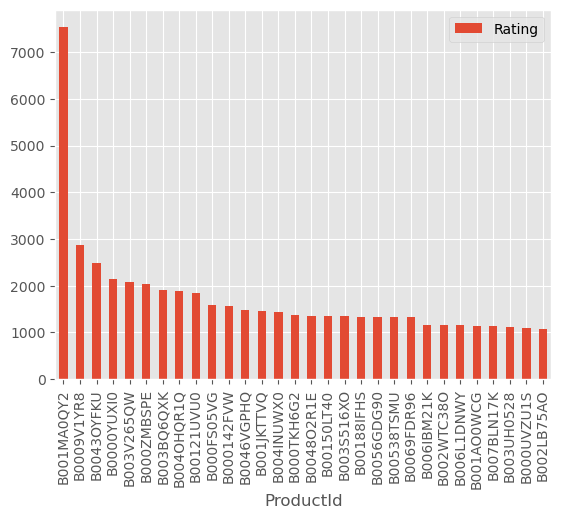

In [9]:
most_popular.head(30).plot(kind = "bar")

In [47]:
#Inferences
#ProductId- 9746427962, 9759091062, 9788071198,7806397051,9788072216,3227001381 has highest product rating with 41,40,36,35,34,25
# out of 1000 user records.

# Recommendation items to users purchase history and overall ratings of products

In [ ]:
#Using model collabarative filtering technique
#It's used for personalized recommendations to customers by two methods: i.user based collabarative filtering technique and 
#item-based collabarative filtering technique.
# we are using user based collabartive technique where alagorithm developed to find users who have similar purchase behavior and patterns
#It creates user based matrix and recommends users who bought similar products.

In [1]:
#utility matrix: The utility matrix is typically sparse because most users have only rated a small subset of the items. 
#The sparsity of the matrix poses a challenge for collaborative filtering algorithms because
#it limits the number of similar users that can be identified.
#To overcome this challenge, user-based collaborative filtering algorithms use similarity measures to identify users 
#with similar preferences. These similarity measures are based on the ratings given by users to items in the utility matrix.
#Some common similarity measures used in collaborative filtering include Pearson correlation, cosine similarity, and 
#Euclidean distance.

In [10]:
amazon_data3=amazon_data1.head(10000)
amazon_data3

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
9995,A9V4K2YJ2DWTQ,B000052YQ2,3.0,1396396800
9996,A3033CXHQ0NF8J,B000052YQ2,5.0,1291248000
9997,A1Z66KHEXSF3L5,B000052YQ2,3.0,1361577600
9998,A1Y7D2DRVBN59D,B000052YQ2,5.0,1402099200


In [11]:
ratings_utility_matrix = data3.pivot_table( index='UserId', columns='ProductId',values='Rating',fill_value=0)
ratings_utility_matrix

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZZHJZP4GQPPZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZNK89PXD006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZZOFVMQC0BJG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
ratings_utility_matrix.shape

(9697, 886)

In [67]:
#Transposing the matrix

In [13]:
R = ratings_utility_matrix.T
R.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
R.shape

(886, 9697)

In [79]:
#unique products in subset of data

In [15]:
R1=R

In [83]:
#Decomposing the matrix

In [ ]:
#Matrix decomposition can help us to overcome this sparsity problem and extract latent features or factors
#that can better represent the user-item preferences.

In [ ]:
#Singular Value Decomposition (SVD):
#SVD is a widely used method for matrix decomposition in collaborative filtering. SVD factorizes the user-item rating matrix
#into three matrices: a user matrix, a diagonal matrix of singular values, and an item matrix. The singular values capture 
#the most important patterns in the data, and the user and item matrices represent the latent factors that influence the
#user-item ratings.
#Use case: Netflix movie recommendations. SVD can be used to decompose the user-item rating matrix into user and item factors,
#which can then be used to make personalized movie recommendations to users.

In [16]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(R)
decomposed_matrix.shape

(886, 10)

In [18]:
pd.DataFrame(decomposed_matrix)

,0,1,2,3,4,5,6,7,8,9
0,5.678864e-15,1.359389e-13,-7.821196e-15,3.975933e-14,1.116793e-13,2.136947e-13,-9.561400e-13,4.491095e-14,9.742808e-13,-9.097972e-13
1,-4.815981e-14,-6.778014e-13,-3.148938e-13,8.014292e-13,1.083580e-14,-4.101621e-12,2.275671e-12,-5.335276e-12,-9.501594e-12,2.673055e-11
2,-4.025478e-16,-1.447387e-15,9.623681e-15,7.699425e-15,1.032033e-16,3.676926e-15,6.287555e-14,-6.561241e-14,-4.572503e-14,3.717882e-14
3,9.978644e-24,-3.821025e-22,-2.860029e-22,-3.469660e-22,1.519806e-22,-1.898940e-21,1.293801e-21,1.151051e-21,-2.745173e-21,-7.338191e-21
4,-5.719339e-15,-1.666224e-13,-4.367873e-14,7.297121e-14,7.133329e-14,-8.994054e-13,3.870791e-13,-7.923890e-13,-1.557019e-12,5.883963e-12
...,...,...,...,...,...,...,...,...,...,...
881,5.288069e-13,6.606772e-12,5.395996e-12,8.078745e-12,5.527133e-12,1.839264e-11,-2.004374e-11,9.333076e-11,1.752634e-10,-1.891397e-10
882,-1.107259e-07,-5.933412e-07,1.749105e-06,6.774393e-06,6.854519e-06,3.992362e-06,1.700115e-05,-5.584623e-06,4.445083e-06,2.399472e-05
883,3.125019e-06,2.279489e-01,-1.041014e-02,-1.391153e-05,-4.151443e-05,-9.438544e-04,-6.233536e-05,-3.841313e-03,-6.382085e-05,-4.898879e-02
884,8.555367e-06,9.116176e-04,-1.098624e-04,-8.598604e-05,-8.620017e-05,1.268204e-03,3.084534e-03,1.855850e-03,1.591696e-03,-3.306159e-03


In [20]:
#correlation matrix
#correlation matrix provides a pairwise correlation between all the users or items in a dataset.
#It helps to identify the users or items that are most similar to each other and can be used to generate recommendations.

In [19]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [21]:
pd.DataFrame(correlation_matrix)

,0,1,2,3,4,5,6,7,8,9,...,876,877,878,879,880,881,882,883,884,885
0,1.000000,-0.756813,-0.774663,0.158901,-0.722297,-0.893332,-0.677983,-0.475990,-0.893478,0.892929,...,0.005331,0.392565,0.000494,-0.660370,0.188409,0.825327,-0.693870,0.214087,0.264826,-0.718795
1,-0.756813,1.000000,0.599552,-0.702873,0.995768,0.958326,0.922236,0.538102,0.958166,-0.630261,...,0.288474,-0.627846,-0.542514,0.983649,-0.687576,-0.933651,0.786272,-0.241089,-0.786596,0.558424
2,-0.774663,0.599552,1.000000,-0.175291,0.538432,0.752466,0.529504,0.195113,0.752669,-0.865758,...,0.222863,-0.512515,0.205465,0.536583,0.092551,-0.747872,0.757513,-0.085987,-0.225494,0.827646
3,0.158901,-0.702873,-0.175291,1.000000,-0.739138,-0.504638,-0.686420,-0.327588,-0.504227,0.043684,...,-0.454316,0.327980,0.819502,-0.810869,0.880074,0.507813,-0.609474,0.256409,0.736774,-0.319968
4,-0.722297,0.995768,0.538432,-0.739138,1.000000,0.936017,0.907946,0.578019,0.935850,-0.566964,...,0.319048,-0.613675,-0.585881,0.986463,-0.739663,-0.899615,0.779121,-0.264446,-0.794278,0.528127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,0.825327,-0.933651,-0.747872,0.507813,-0.899615,-0.954422,-0.934298,-0.293096,-0.954237,0.838226,...,-0.064655,0.558383,0.389704,-0.898771,0.467724,1.000000,-0.705290,0.138403,0.705301,-0.630498
882,-0.693870,0.786272,0.757513,-0.609474,0.779121,0.797820,0.613851,0.577222,0.797949,-0.559558,...,0.531039,-0.551251,-0.194706,0.774049,-0.407151,-0.705290,1.000000,-0.380968,-0.425318,0.789558
883,0.214087,-0.241089,-0.085987,0.256409,-0.264446,-0.179294,-0.151818,-0.200638,-0.179300,0.079290,...,-0.165522,-0.012506,0.208018,-0.253212,0.321764,0.138403,-0.380968,1.000000,0.238653,-0.055886
884,0.264826,-0.786596,-0.225494,0.736774,-0.794278,-0.631485,-0.775817,-0.226818,-0.631106,0.249512,...,-0.280616,0.610989,0.738923,-0.820419,0.740324,0.705301,-0.425318,0.238653,1.000000,-0.073233


In [26]:
#Isolating productId #XXX from correlation matrix

In [119]:
R.index[63]

'3292000971'

In [29]:
#index XX of productID purchased by customer

In [120]:
a='3292000971'
type(a)
product_names=list(R.index)
product_names
product_ID=product_names.index(a)
product_ID

63

In [64]:
#Correlation for all items with the item purchased by this customer based on items rated by other customers people 
#who bought the same product

In [121]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID

array([-0.50111047,  0.04903536, -0.87074177,  0.91607507, -0.94529768,
        0.16263571,  0.41202106,  0.98096332,  0.16154635,  0.85908705,
        0.41202106,  0.85186738,  0.41706261,  0.23455892,  0.16263571,
        0.41202106,  0.41202106,  0.36533322,  0.41706186, -0.79283487,
        0.80090008, -0.23542098,  0.43025496,  0.85055575,  0.80501964,
        0.3684661 ,  0.36284195,  0.33736492,  0.85055575,  0.36705269,
        0.35809767,  0.16273764,  0.40262963,  0.36873492,  0.85166162,
        0.16263571,  0.36873492, -0.33277348,  0.16056854,  0.33263876,
        0.33280691,  0.3684661 ,  0.16356003,  0.16263571,  0.16263571,
        0.16263571,  0.85055575,  0.16263571,  0.16177772,  0.33263876,
        0.41801408,  0.4678982 ,  0.84831206, -0.69486019, -0.1128132 ,
       -0.35433247, -0.24576776,  0.65830462,  0.4310227 ,  0.88848583,
       -0.64055672, -0.91600821, -0.32414709,  1.        ,  0.59819577,
       -0.79625632,  0.62691648, -0.26992012,  0.57429581, -0.45

In [122]:
correlation_product_ID.shape

(886,)

In [70]:
#recommending Top 10 highly correlated products

In [124]:
Recommend = list(R.index[correlation_product_ID>0.9 ])
Recommend.remove(a)
Recommend[0:9]

['0737104473',
 '130414089X',
 '7806397051',
 '9748776093',
 '9788072100',
 '9788072976',
 '9788073239',
 '9788074995',
 '9789820615']

In [128]:
#ProductID '3292000971' shows Top 10 highly correlated products using user based colloborative technique.